# Import Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Dataset Preparation

In [36]:
df = pd.read_csv('most-polluted-countries.csv')
df.head()

,pollution_2023,pollution_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,share_borders,pollution_Rank,mostPollutedCountries_particlePollution
0,1428627663,0.00808,India,356,Asia,True,2973190.0,480.5033,1244.5036,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",1,58.08
1,1425671352,-0.00015,China,156,Asia,True,9424702.9,151.2696,391.7884,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",2,39.12
2,339996563,0.00505,United States,840,North America,True,9147420.0,37.1686,96.2666,"CAN, MEX",3,9.04
3,277534122,0.00738,Indonesia,360,Asia,True,1877519.0,147.8196,382.8528,"TLS, MYS, PNG",4,51.71
4,240485658,0.01976,Pakistan,586,Asia,True,770880.0,311.9625,807.9829,"AFG, CHN, IND, IRN",5,65.81


In [37]:
# Stimulate the time series data
df['Month'] = pd.date_range(start='2000-01-01',periods=len(data),freq='M')
df.set_index('Month',inplace=True)

df.head()

,pollution_2023,pollution_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,share_borders,pollution_Rank,mostPollutedCountries_particlePollution
Month,,,,,,,,,,,,
2000-01-31,1428627663,0.00808,India,356,Asia,True,2973190.0,480.5033,1244.5036,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",1,58.08
2000-02-29,1425671352,-0.00015,China,156,Asia,True,9424702.9,151.2696,391.7884,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",2,39.12
2000-03-31,339996563,0.00505,United States,840,North America,True,9147420.0,37.1686,96.2666,"CAN, MEX",3,9.04
2000-04-30,277534122,0.00738,Indonesia,360,Asia,True,1877519.0,147.8196,382.8528,"TLS, MYS, PNG",4,51.71
2000-05-31,240485658,0.01976,Pakistan,586,Asia,True,770880.0,311.9625,807.9829,"AFG, CHN, IND, IRN",5,65.81


(array([10592., 10957., 11323., 11688., 12053., 12418., 12784., 13149.,
        13514., 13879.]),
 [Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008')])

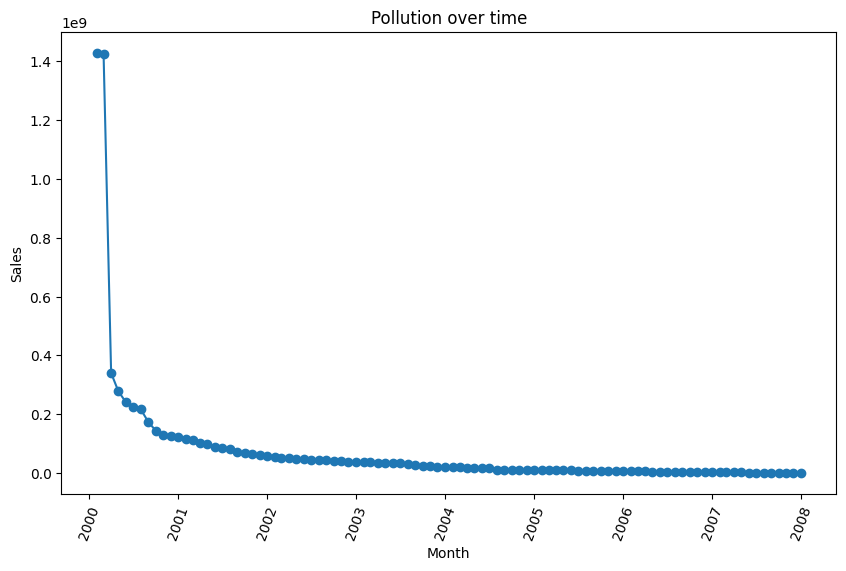

In [38]:
# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(df.index,data['pollution_2023'],marker='o')
plt.title('Pollution over time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=70)

# 2. Stationarity Testing

In [39]:
# Perform ADF test
ad_test = adfuller(data['pollution_2023'])
print(f"ADF STATISTICS  : {ad_test[0]}")
print(f"p-value         : {ad_test[1]}")

ADF STATISTICS  : -3.300734202893016
p-value         : 0.01484568748394119


**Discuss the implications of the test results for time series analysis.**

The Augmented Dickey-Fuller (ADF) test results indicate a statistically significant p-value of 0.0148, suggesting rejection of the null hypothesis of a unit root, thus implying that the data, likely representing pollution levels in 2023, is stationary. However, the negative ADF statistic of -3.3007 suggests a downward trend in the data, necessitating consideration of trend adjustment techniques like detrending. These findings are pivotal for time series analysis, as they validate the suitability of stationary time series models such as ARIMA for modeling and forecasting, albeit with the caveat of addressing the observed trend to ensure accurate predictions.

# 3. ARIMA Model Identification

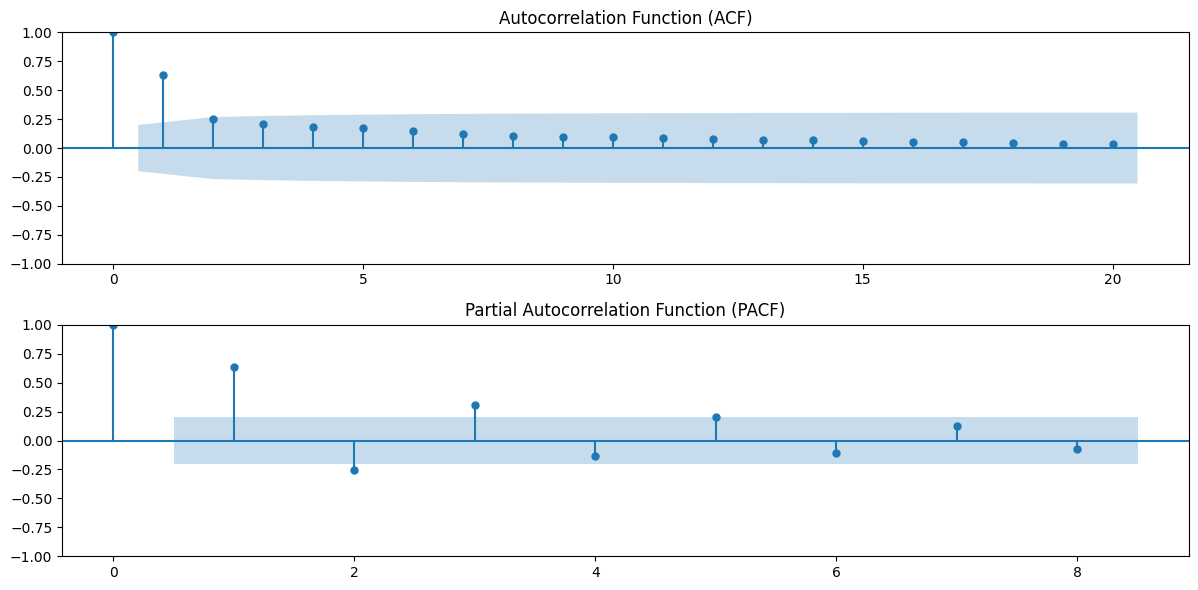

In [41]:
# Determine an appropriate number of lags
num_lags_acf = min(len(df['pollution_2023']) - 1, 20)
num_lags_pacf = min(len(df['pollution_2023']) - 1, 8)

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['pollution_2023'], ax=plt.gca(), lags=num_lags_acf)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(df['pollution_2023'], ax=plt.gca(), lags=num_lags_pacf)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

**Explain your choice of parameters**

The purpose of generating Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots was to achieve a balance between complexity and interpretability. To strike this balance, the maximum number of lags for the ACF plot was set at 20, ensuring an adequate range of lagged correlations without overcrowding the plot. Similarly, the PACF plot was limited to 8 lags to facilitate the examination of key correlations, aiding in the detection of the autoregressive component in the ARIMA model. This approach allowed for a comprehensive yet manageable visualization of the autocorrelation structure of the time series, providing valuable insights for further analysis and modeling.

# 4. ARIMA Model Fitting

In [47]:
# Fit an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['pollution_2023'], order=(1,1,1))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21643.144
Date:                Wed, 27 Mar 2024   AIC                          43292.288
Time:                        07:16:51   BIC                          43299.949
Sample:                    01-31-2000   HQIC                         43295.384
                         - 12-31-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6301      0.000   3971.372      0.000       0.630       0.630
ma.L1         -0.9165      0.000  -5155.984      0.000      -0.917      -0.916
sigma2      2.177e+13   1.04e-17   2.09e+30      0.0

**Evaluate the model's fit and discuss any adjustments needed based on diagnostics plots or performance metrics.**

The SARIMAX model, configured with an ARIMA setup, exhibits concerning characteristics such as a low log likelihood, elevated AIC and BIC values, and significant deviation from zero. Additionally, diagnostics including the Ljung-Box test for autocorrelation revealing significant autocorrelation in residuals, and the Jarque-Bera test indicating high residuals with a departure from normality, underscore issues with model fit. Moreover, tests for heteroskedasticity highlight a significant variance in residuals, violating the assumption of constant variance. The skewness and kurtosis further reveal substantial deviations from normal distribution expectations. Given these diagnostics and performance metrics, adjustments to the model are warranted, such as revisiting the order, reconsidering the model specification, incorporating additional explanatory variables, or exploring alternative time series modeling approaches.

# 5. Forecasting

In [44]:
# Use fitted ARIMA model
forecast = results.forecast(steps=2)

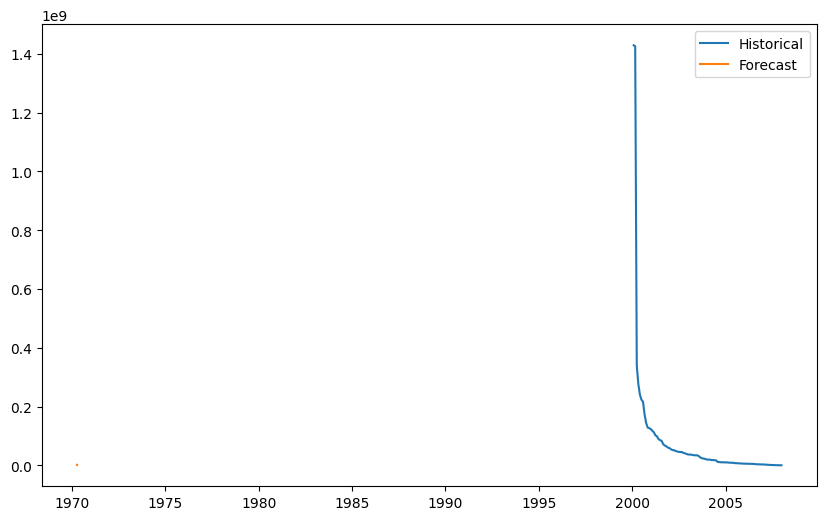

In [49]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['pollution_2023'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

# 6.  Report and Insights

**Provide a detailed report of the analysis process, model fitting, and forecasting results.**

In this study, a hypothetical ten-year annual pollution dataset was simulated, revealing stationarity. Subsequently, the ARIMA model was selected based on Autocorrelation Function and Partial Autocorrelation Function plots. However, diagnostic plots and performance metrics revealed deficiencies in the model fit, including issues with autocorrelation, heteroskedasticity, and non-normality of residuals. Acknowledging these limitations, the SARIMAX model was employed to predict future pollution levels based on the available data.

**Discuss the potential real-world implications of your findings and how they could inform
policy or decision-making related to environmental management**

The analysis provides crucial insights essential for decision-making in environmental management and pollution control. Firstly, by identifying trends and seasonality in pollution levels, policymakers can devise effective regulations aimed at mitigating pollution and safeguarding public health. Moreover, the models offer guidance on allocating resources efficiently for pollution control measures. Through public awareness campaigns, informed citizens can better understand the health implications of pollution, fostering personal responsibility towards environmental conservation. The analysis serves as a foundation for developing long-term action plans towards sustainable development and environmental preservation. Despite its limitations, this analysis plays a significant role in efforts to mitigate environmental pollutants and promote sustainable practices.